In [90]:
import numpy as np
import pandas as pd
from sklearn import model_selection

input_file = 'G:/Data science/DataScience/DataScience-Python3/mammographic_masses.data.txt';
masses_data = pd.read_csv(input_file,names =['BI-RADS','Age','Shape','Margin','Density','Severity'],usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head(10)

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
8,57.0,1.0,5.0,3.0,1
9,60.0,NaN,5.0,1.0,1


In [91]:
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [92]:
masses_data = masses_data.dropna()

In [93]:
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,55.777377,2.783394,2.814681,2.915764,0.484958
std,14.663528,1.242331,1.566771,0.350737,0.500075
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [94]:
features = list(masses_data.columns[:4])
print(features)
labels = list(masses_data.columns[4:])
print(labels)

['Age', 'Shape', 'Margin', 'Density']
['Severity']


In [95]:
X = masses_data[features].values
y = masses_data[labels].values
y = y.ravel()

In [96]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.76580356,  0.17445989,  1.39563127,  0.24031298],
       [ 0.15166622,  0.97988304,  1.39563127,  0.24031298],
       [-1.89545824, -1.43638642, -1.15892729,  0.24031298],
       ..., 
       [ 0.56109111,  0.97988304,  1.39563127,  0.24031298],
       [ 0.69756608,  0.97988304,  1.39563127,  0.24031298],
       [ 0.42461615,  0.17445989,  0.11835199,  0.24031298]])

In [97]:
#DECISION TREE CLASSIFIER

In [98]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [99]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.77403846153846156

In [100]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
def createROC(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

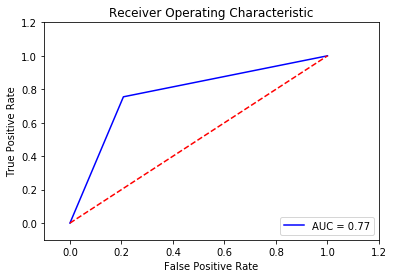

In [101]:
createROC(y_test, y_pred)

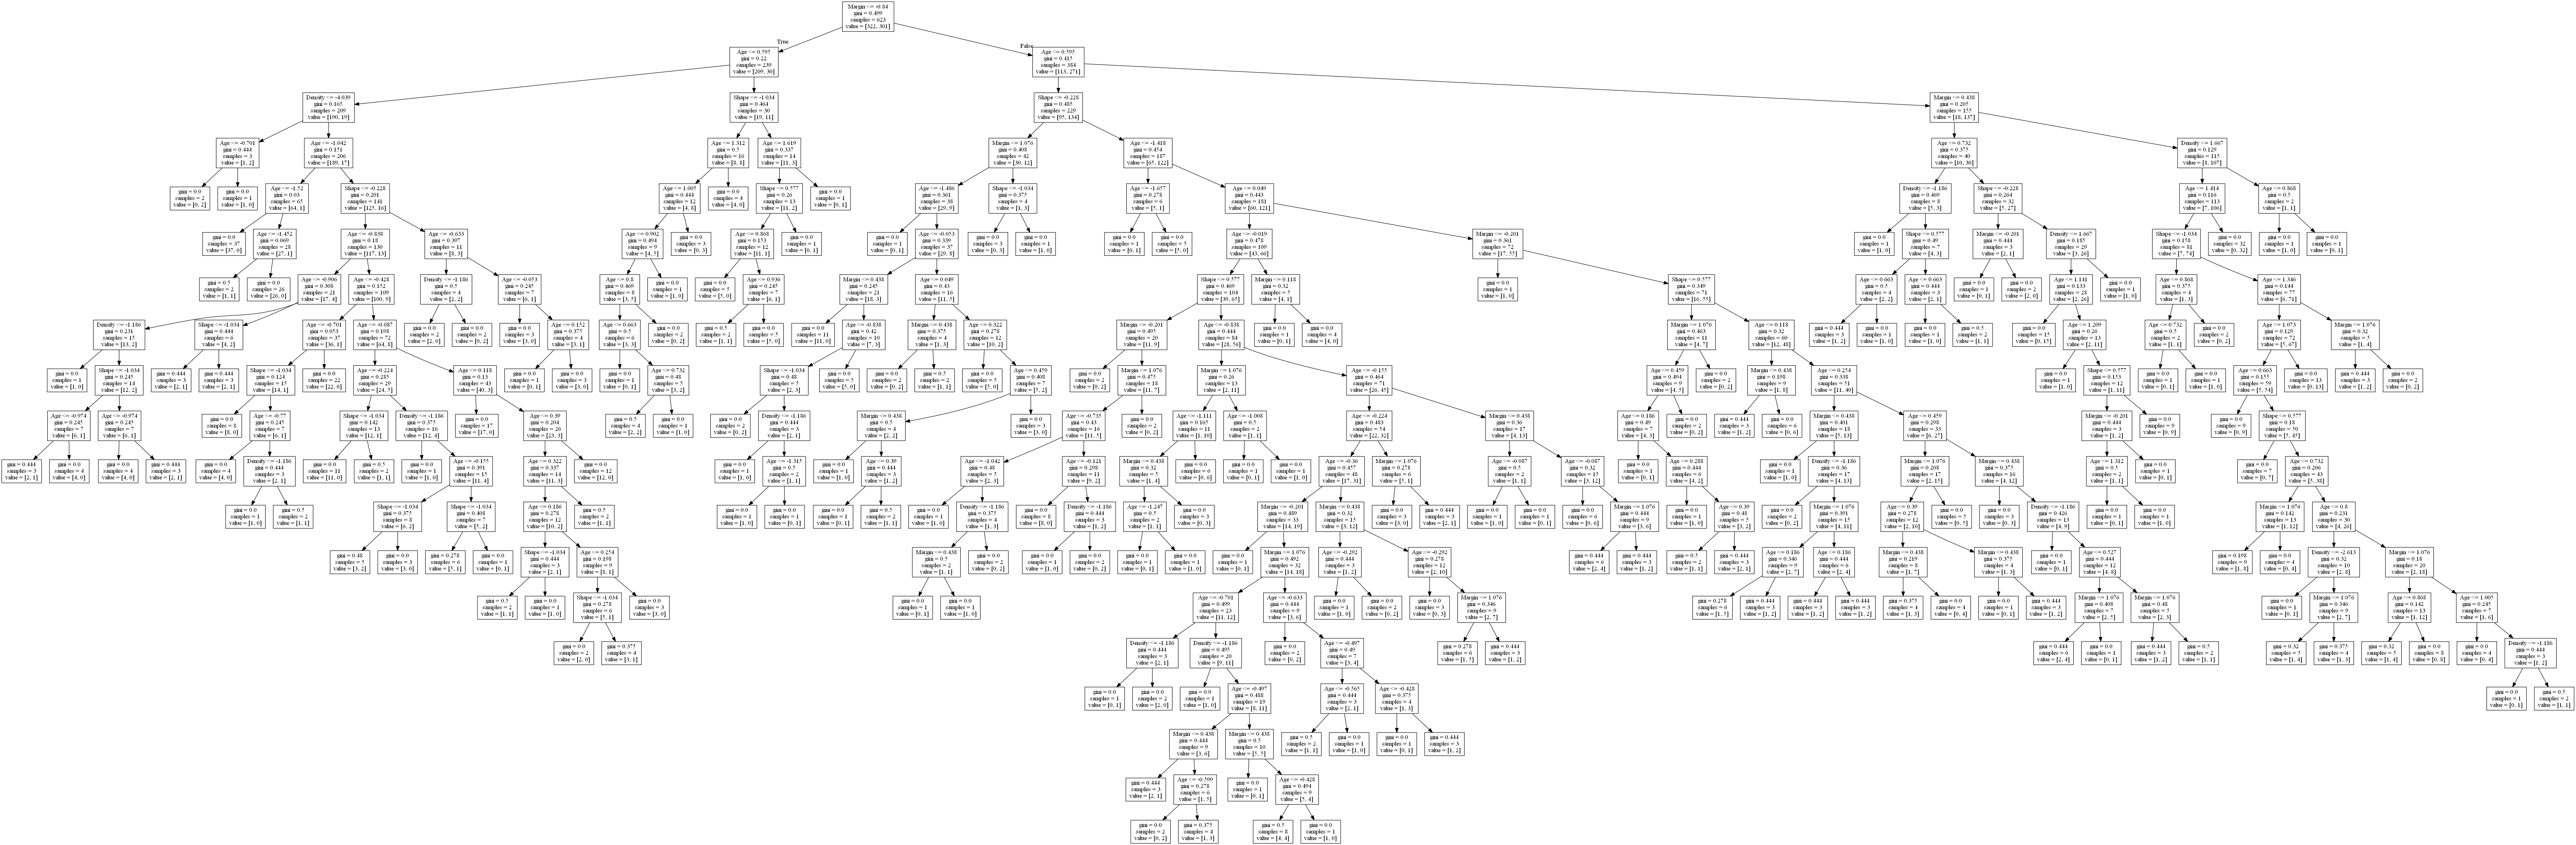

In [102]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [103]:
# Using K-Fold Cross Validation
clf = tree.DecisionTreeClassifier(random_state=0)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.71428571  0.75        0.71428571  0.73493976  0.78313253  0.71084337
  0.72289157  0.75903614  0.7804878   0.68292683]
0.735282943621


In [121]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.67857143  0.75        0.80952381  0.78313253  0.84337349  0.73493976
  0.74698795  0.78313253  0.84146341  0.73170732]
0.770283223486


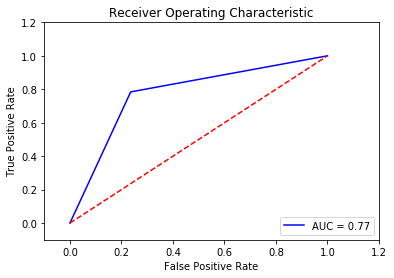

In [122]:
createROC(y_test, y_pred)

In [104]:
# SVM

In [105]:
#1. LINEAR KERNEL
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.71428571  0.75        0.71428571  0.73493976  0.78313253  0.71084337
  0.72289157  0.75903614  0.7804878   0.68292683]
0.735282943621


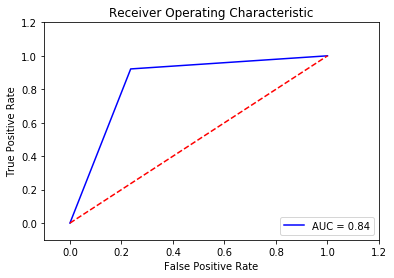

In [106]:
createROC(y_test, y_pred)

In [107]:
#2. POLY KERNEL
from sklearn import svm
svc = svm.SVC(kernel='poly', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.71428571  0.75        0.71428571  0.73493976  0.78313253  0.71084337
  0.72289157  0.75903614  0.7804878   0.68292683]
0.735282943621


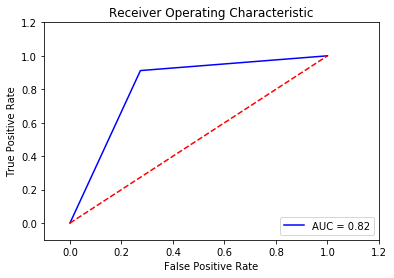

In [108]:
createROC(y_test, y_pred)

In [109]:
#3. RBF KERNEL
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.71428571  0.75        0.71428571  0.73493976  0.78313253  0.71084337
  0.72289157  0.75903614  0.7804878   0.68292683]
0.735282943621


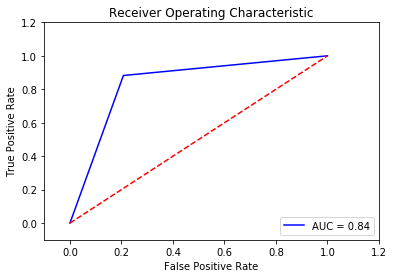

In [110]:
createROC(y_test, y_pred)

In [111]:
#4. SIGMOID KERNEL
from sklearn import svm
svc = svm.SVC(kernel='sigmoid', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.71428571  0.75        0.71428571  0.73493976  0.78313253  0.71084337
  0.72289157  0.75903614  0.7804878   0.68292683]
0.735282943621


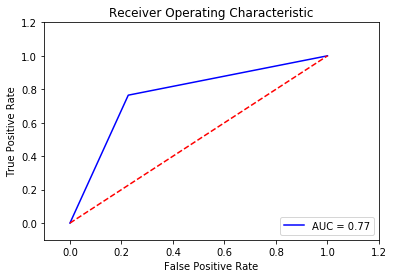

In [112]:
createROC(y_test, y_pred)

In [ ]:
# NAIVE BAYES

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
clf = MultinomialNB()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# clf.score(X_test,y_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.73809524  0.76190476  0.80952381  0.8313253   0.8313253   0.75903614
  0.71084337  0.75903614  0.91463415  0.70731707]
0.78230412941


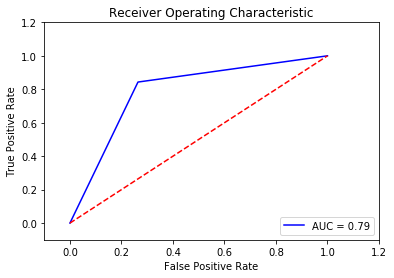

In [114]:
createROC(y_test, y_pred)

In [ ]:
# LOGISTIC REGRESSION

In [115]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[ 0.75        0.76190476  0.86904762  0.81927711  0.8313253   0.72289157
  0.78313253  0.8313253   0.8902439   0.79268293]
0.805183101745


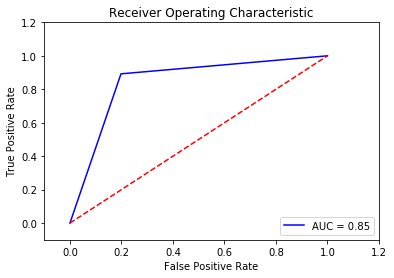

In [116]:
createROC(y_test, y_pred)

In [ ]:
# ARTIFICIAL NEURAL NETWORK

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [118]:
model = Sequential()
model.add(Dense(64,input_dim=4,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=2)

Epoch 1/100
 - 1s - loss: 0.6849 - acc: 0.7095
Epoch 2/100
 - 0s - loss: 0.6248 - acc: 0.7785
Epoch 3/100
 - 0s - loss: 0.5377 - acc: 0.7769
Epoch 4/100
 - 0s - loss: 0.5117 - acc: 0.7753
Epoch 5/100
 - 0s - loss: 0.4987 - acc: 0.7881
Epoch 6/100
 - 0s - loss: 0.5005 - acc: 0.7849
Epoch 7/100
 - 0s - loss: 0.4887 - acc: 0.7769
Epoch 8/100
 - 0s - loss: 0.4838 - acc: 0.7865
Epoch 9/100
 - 0s - loss: 0.5052 - acc: 0.7753
Epoch 10/100
 - 0s - loss: 0.4917 - acc: 0.7705
Epoch 11/100
 - 0s - loss: 0.4774 - acc: 0.7721
Epoch 12/100
 - 0s - loss: 0.4855 - acc: 0.7849
Epoch 13/100
 - 0s - loss: 0.4893 - acc: 0.7785
Epoch 14/100
 - 0s - loss: 0.4843 - acc: 0.7897
Epoch 15/100
 - 0s - loss: 0.4914 - acc: 0.7801
Epoch 16/100
 - 0s - loss: 0.4839 - acc: 0.7737
Epoch 17/100
 - 0s - loss: 0.4801 - acc: 0.7849
Epoch 18/100
 - 0s - loss: 0.4802 - acc: 0.7801
Epoch 19/100
 - 0s - loss: 0.4818 - acc: 0.7769
Epoch 20/100
 - 0s - loss: 0.4796 - acc: 0.7817
Epoch 21/100
 - 0s - loss: 0.4847 - acc: 0.7769
E

In [119]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.458361490415
Test accuracy: 0.841346153846


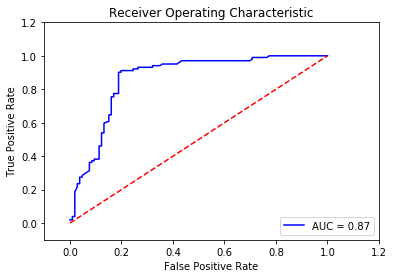

In [120]:
y_pred = model.predict(X_test)
createROC(y_test, y_pred)

In [ ]:
# As we can see, ANN performs the best in this problem with AUC of 0.87 +/- 0.01.
# Next is the Logistic Regression with AUC of 0.85 +/-0.01